In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("student-mat.csv", delimiter=";")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [6]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
data_encoded = data.copy()

In [9]:
labelencoder = LabelEncoder()

categorical_columns = ['school', 'sex','address','famsize','Pstatus','Mjob', 'Fjob', 'reason', 'guardian']	

for category in categorical_columns:
    data_encoded[category] = labelencoder.fit_transform(data[category])

In [12]:
data_encoded = data_encoded.replace({'yes':1, 'no':0})
data_encoded

C:\Users\dulin\AppData\Local\Temp\ipykernel_45428\865271948.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = data_encoded.replace({'yes':1, 'no':0})


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,0,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,0,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,0,2,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,0,1,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10


In [13]:
data_encoded.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [14]:
scaler = StandardScaler()

columns = ['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']

data_encoded[columns] = scaler.fit_transform(data_encoded[columns])
data_encoded

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,1.023046,1,0,0,1.143856,1.360371,0,4,0,1,0.792251,-0.042286,-0.449944,1,0,0,0,1,1,0,0,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.782467,-1.254791,-0.964934
1,0,0,0.238380,1,0,1,-1.600009,-1.399970,0,2,0,0,-0.643249,-0.042286,-0.449944,0,1,0,0,0,1,1,0,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.782467,-1.520979,-0.964934
2,0,0,-1.330954,1,1,1,-1.600009,-1.399970,0,2,2,1,-0.643249,-0.042286,3.589323,1,0,1,0,1,1,1,0,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-1.179147,-0.722415,-0.090739
3,0,0,-1.330954,1,0,1,1.143856,-0.479857,1,3,1,1,-0.643249,1.150779,-0.449944,0,1,1,1,1,1,1,1,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715,1.002004
4,0,0,-0.546287,1,0,1,0.229234,0.440257,2,2,1,0,-0.643249,-0.042286,-0.449944,0,1,1,0,1,1,0,0,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-1.480807,-0.190038,-0.090739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,2.592380,1,1,0,-0.685387,-0.479857,3,3,0,2,-0.643249,-0.042286,2.242901,0,1,1,0,1,1,0,0,1.178860,1.768808,0.801479,2.831553,2.105989,0.320890,0.661975,-0.575827,-0.456226,-0.309288
391,1,1,0.238380,1,1,1,0.229234,-1.399970,3,3,0,1,0.792251,-1.235351,-0.449944,0,0,0,0,0,1,1,0,-2.171138,0.766399,1.700867,1.707469,1.328545,-1.119469,-0.338906,0.932473,1.407091,1.220553
392,1,1,3.377047,0,0,1,-1.600009,-1.399970,2,2,0,2,-0.643249,-1.235351,3.589323,0,0,0,0,0,1,0,0,1.178860,1.768808,-0.097908,1.707469,0.551100,-0.399289,-0.338906,-0.274167,-0.722415,-0.746385
393,1,1,1.023046,0,1,1,0.229234,-0.479857,3,2,0,1,2.227751,-1.235351,-0.449944,0,0,0,0,0,1,1,0,0.062194,0.766399,-1.896683,1.707469,1.328545,1.041070,-0.714236,0.027493,0.342338,-0.090739


<Axes: >

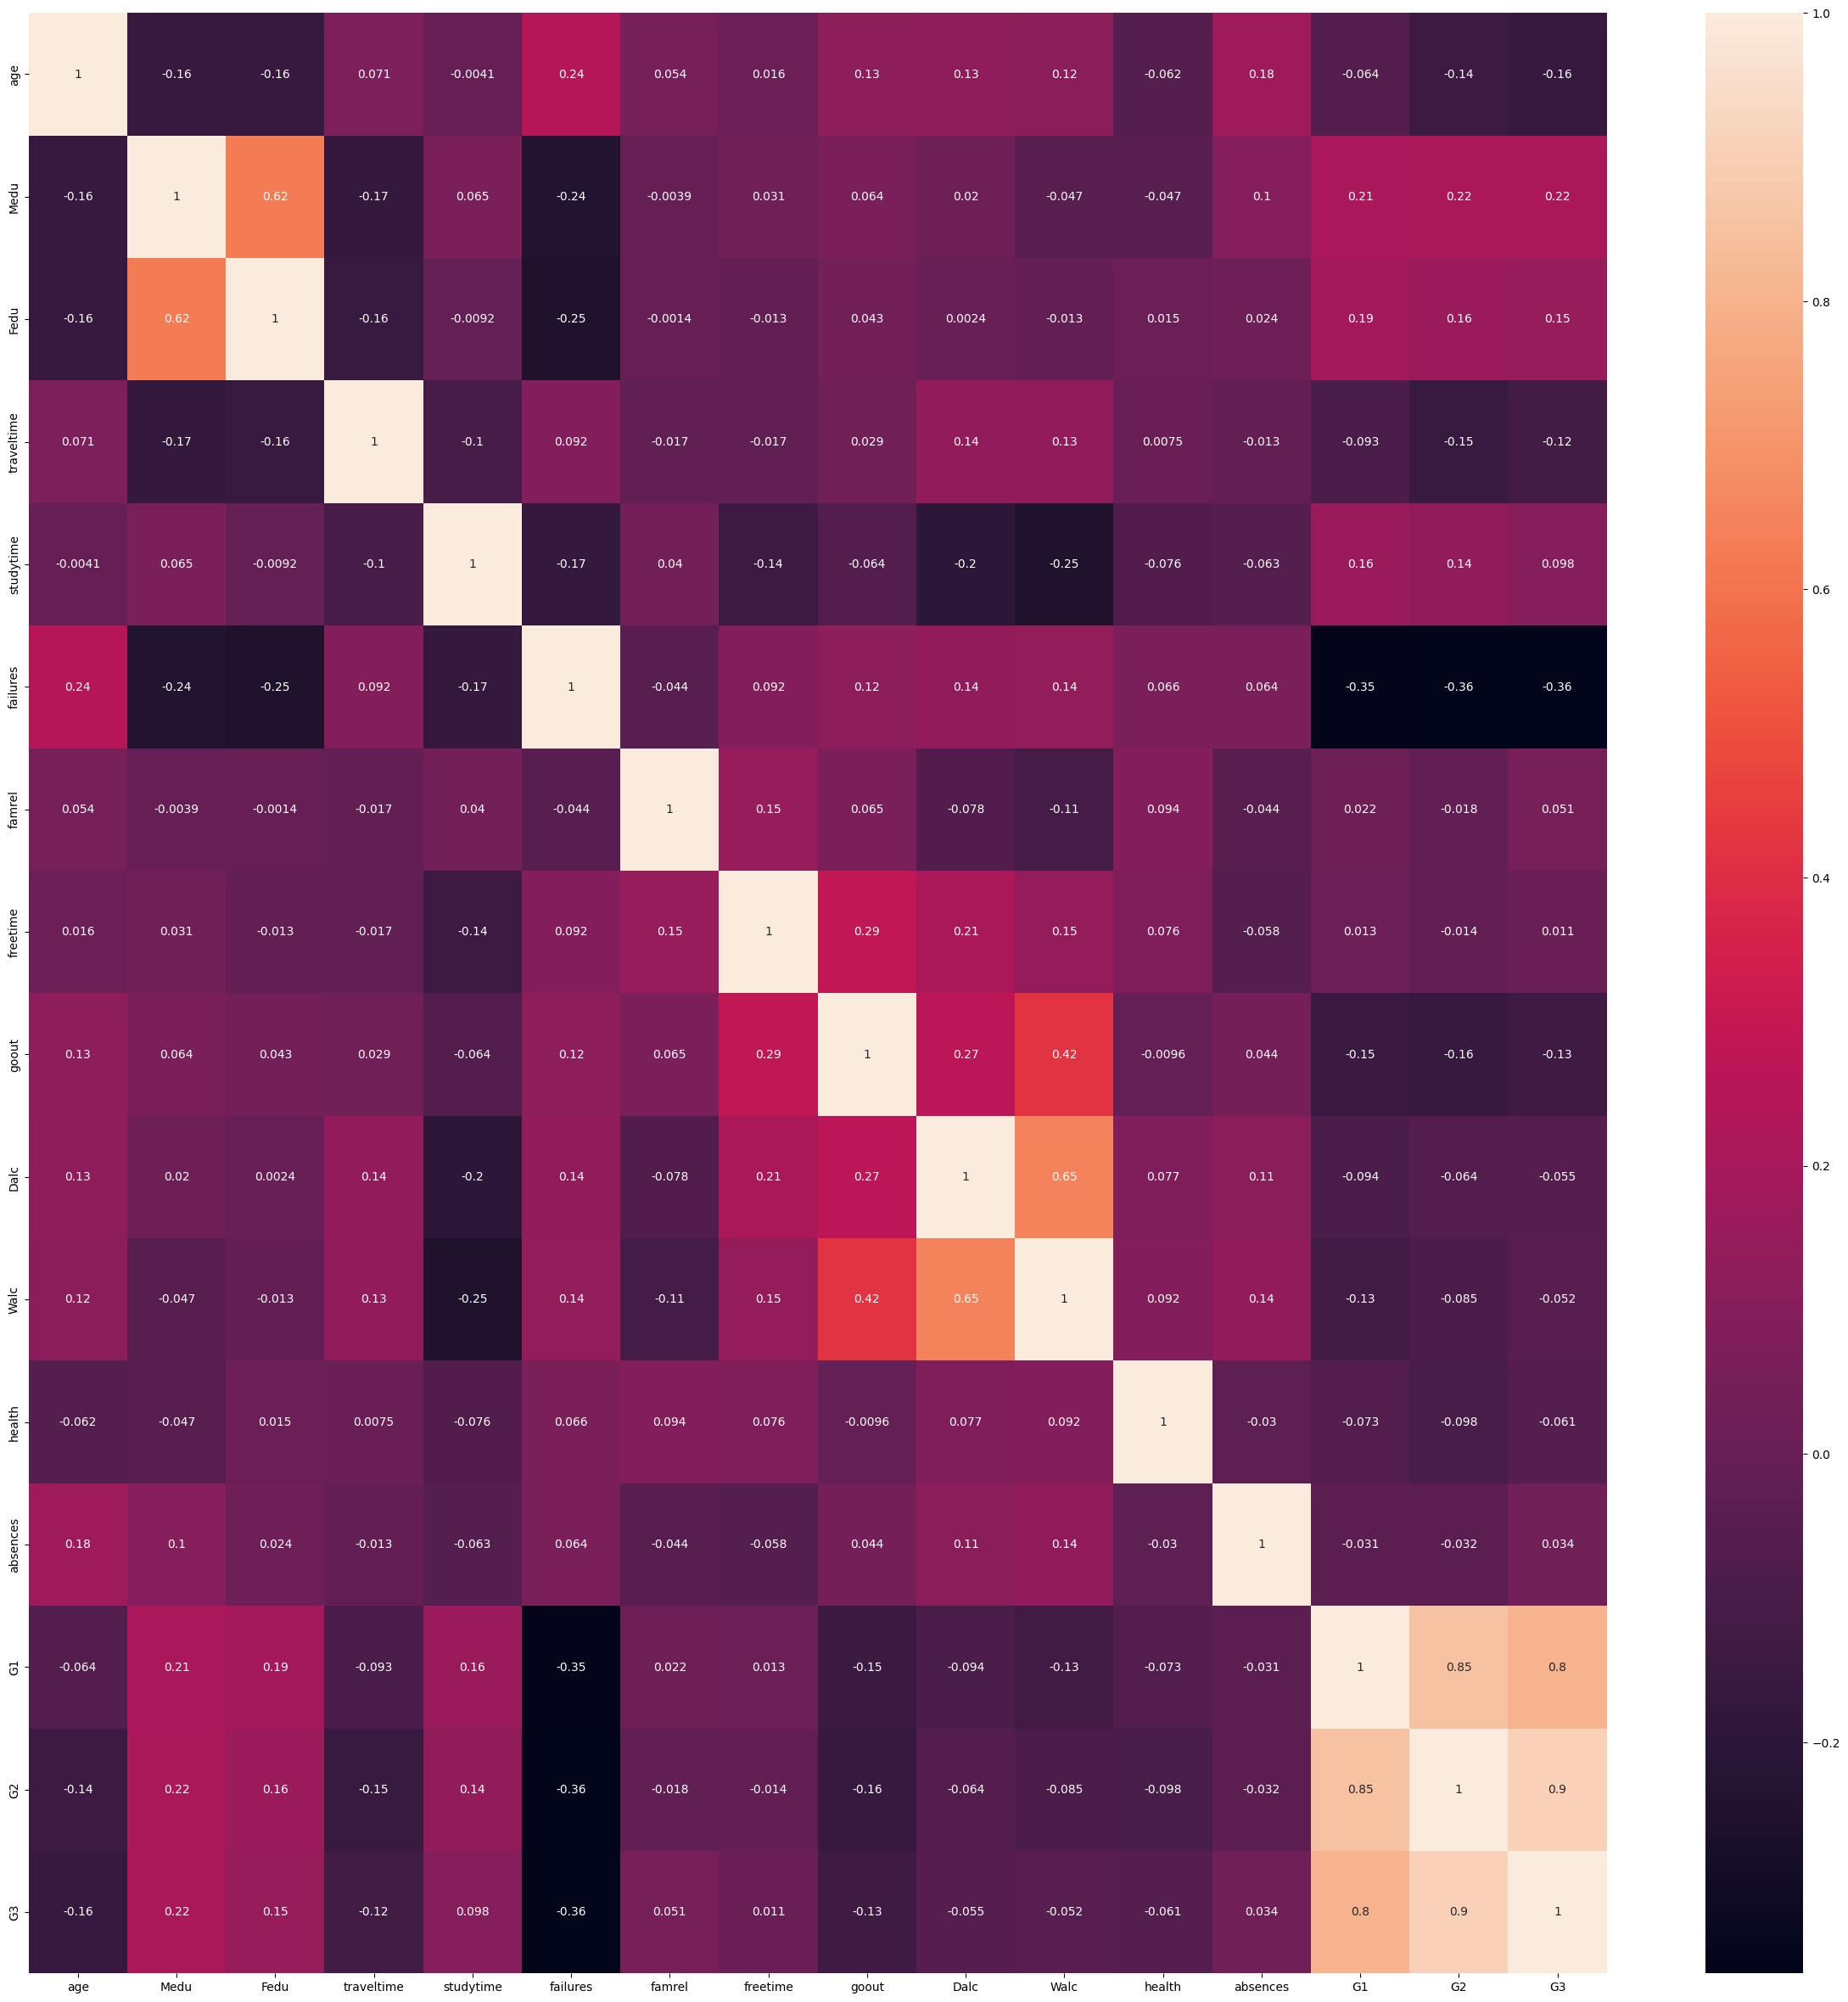

In [17]:
variables = data_encoded[['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']]

correlation = variables.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation,annot=True)

## Training Data withoth the column failure

In [19]:
from sklearn.model_selection import train_test_split

X1 = data_encoded.drop(columns=['G1','G2', 'G3', 'failures'])
Y1 = data_encoded[['G1','G2','G3']]

X1_train, X1_test, Y_train, Y_test =  train_test_split(X1,Y1,test_size=0.3,random_state=1)

In [21]:
from sklearn.linear_model import LinearRegression

lrModel = LinearRegression()
lrModel.fit(X1_train, Y_train)

LinearRegression()

In [22]:
y_pred1 = lrModel.predict(X1_test)

## Plotting Residuals

Text(0.5, 1.0, 'Residual Distribution')

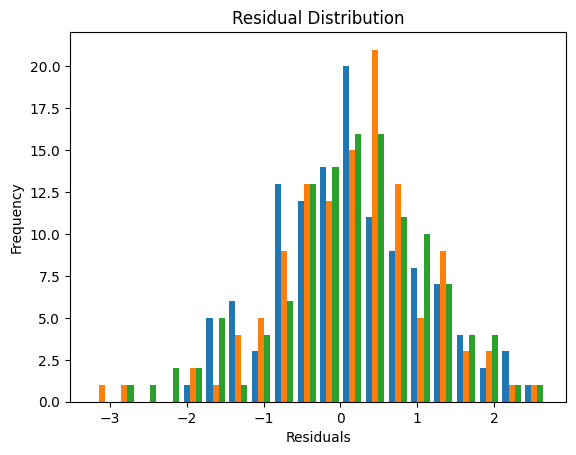

In [23]:
residuals = Y_test- y_pred1

plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")


## R squared Value

In [26]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test,y_pred1)
print(r2)

-0.1967648959065499
